In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('https://github.com/dnllvrvz/Social-Network-Dataset/blob/master/Social%20Network%20Dataset.xlsx?raw=true', sheet_name=['Elements', 'Connections'])

In [3]:
elements_data = data['Elements']
connections_data = data['Connections']

In [4]:
connections_data.head(3)

,From,To,Type,Weight,When
0,S-c1b610,S-7d9053,Other,1.0,2012.0
1,S-4985b3,S-e7dad4,School,1.0,2015.0
2,S-376418,S-ab3070,School,1.0,2012.0


In [5]:
import networkx as nx

In [6]:
edge_list = ['Type', 'Weight','When']
graph_data = nx.convert_matrix.from_pandas_edgelist(connections_data, source= 'From', target='To', edge_attr= edge_list)

In [7]:
from random import sample

In [8]:
sample_edges = sample(graph_data.edges, 20)

In [9]:
graph_data.edges[sample_edges[2]]

{'Type': nan, 'Weight': 0.4, 'When': 2017.0}

In [10]:
node_dic = elements_data.set_index('Label').to_dict(orient = 'index')

In [11]:
nx.set_node_attributes(graph_data, node_dic)

In [12]:
sampled_nodes = sample(graph_data.nodes, 10)

In [13]:
graph_data.nodes[sampled_nodes[0]]

{'Type': 'Student', 'School (ID)': 67, 'Answered the form': 'No'}

In [14]:
nx.draw(graph_data)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [15]:
import matplotlib.pyplot as plt

In [16]:
plt.figure(figsize = (15,6))

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [17]:
### Visulaization in the NetworkX

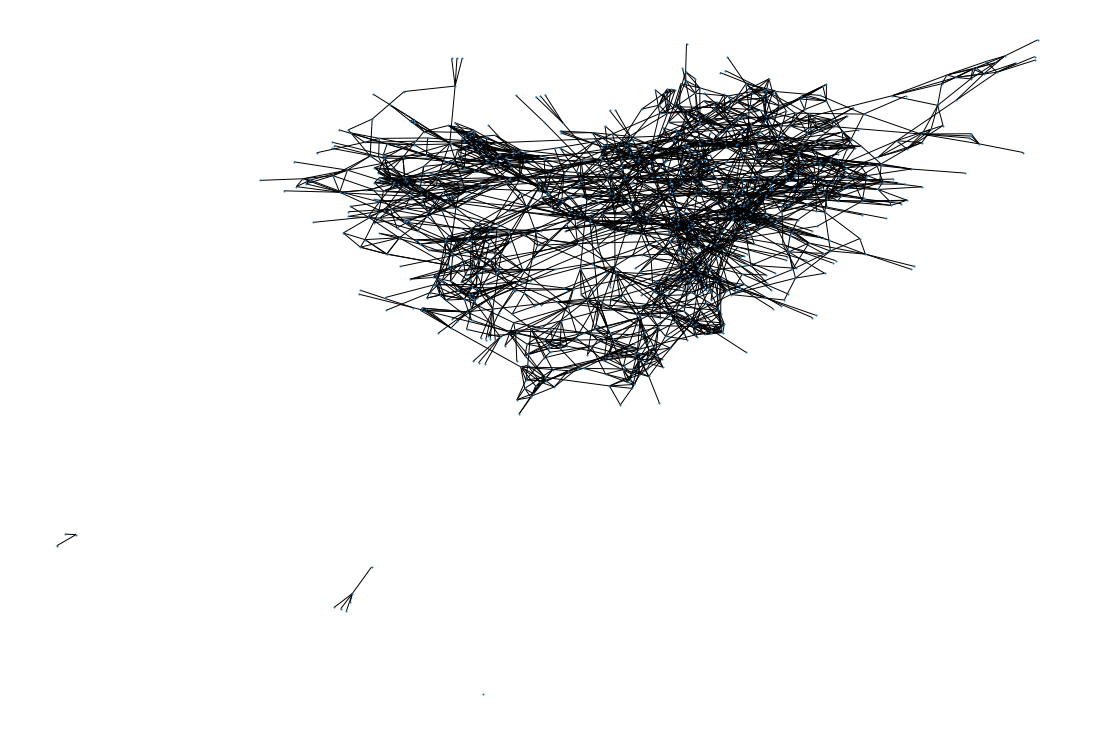

In [19]:
fig = plt.figure(figsize = (15,10))
nx.draw(graph_data,
       colors= 'c1',
       node_size  = 1)

In [21]:
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


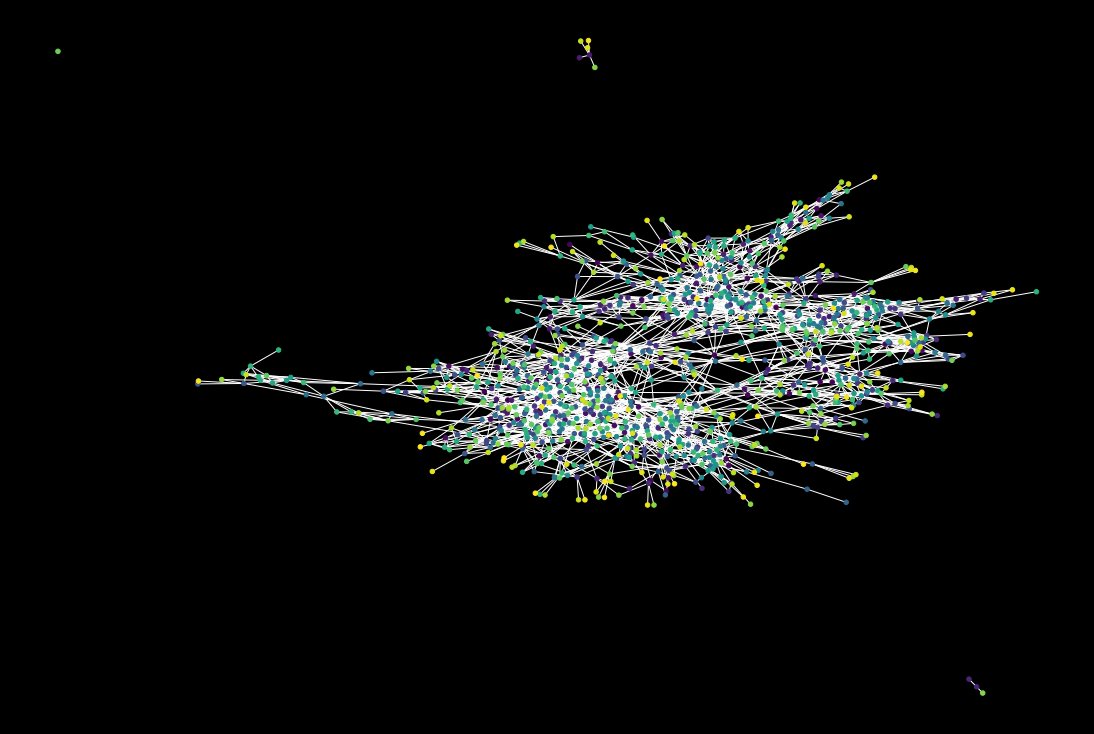

In [27]:
color = np.linspace(0,1,len(graph_data.nodes))
fig = plt.figure(figsize = (15,10))
nx.draw(graph_data,
       node_color= color,
       node_size  = 20,
       edge_color = 'white')
fig.set_facecolor('black')

### Spring layout

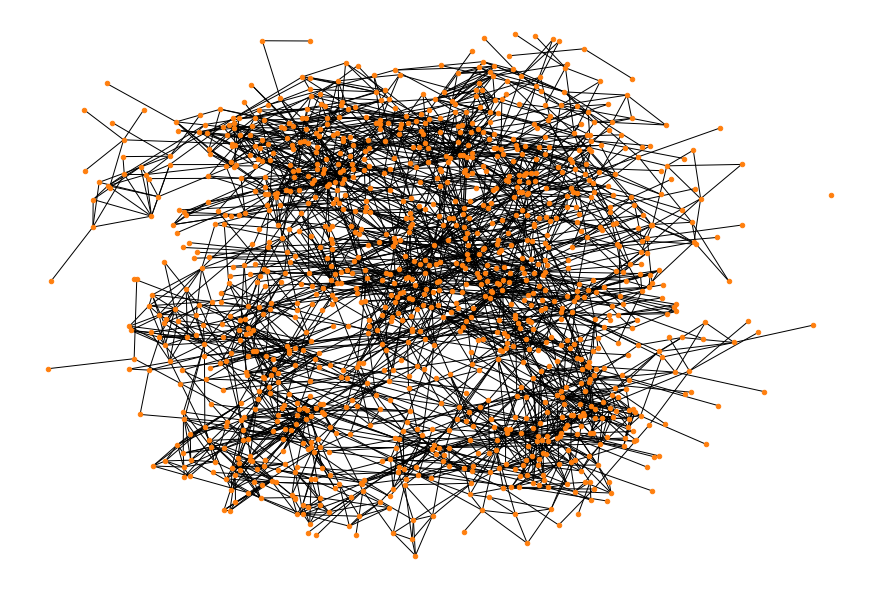

In [29]:
fig = plt.figure(figsize = (12,8))
k = 0.1
layout = nx.spring_layout(graph_data, k= k)
nx.draw(graph_data,
       node_size = 20,
       pos =layout,
        node_color = 'C1'
       )

In [32]:
nx.spring_layout?

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


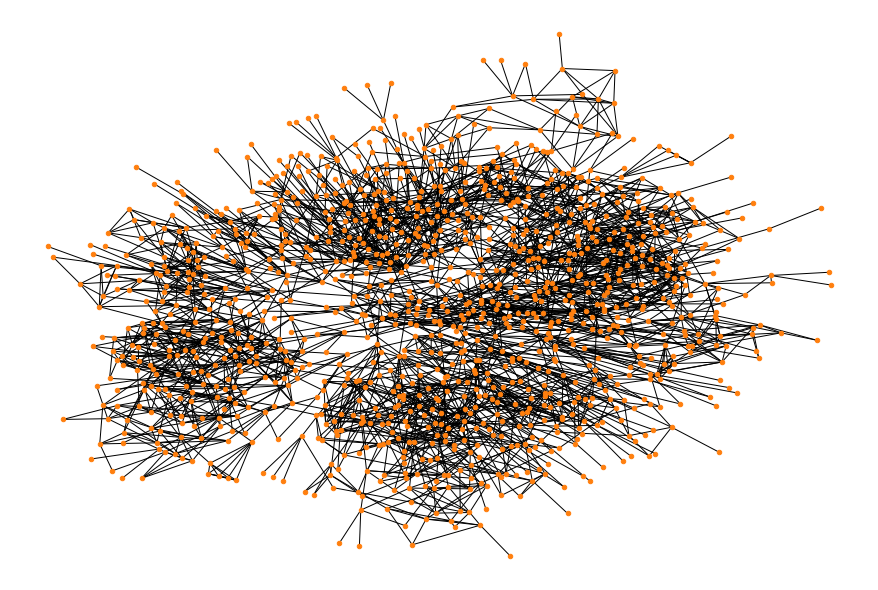

In [30]:
fig = plt.figure(figsize = (12,8))

layout = nx.kamada_kawai_layout(graph_data)
nx.draw(graph_data,
       node_size = 20,
       pos =layout,
        node_color = 'C1'
       )

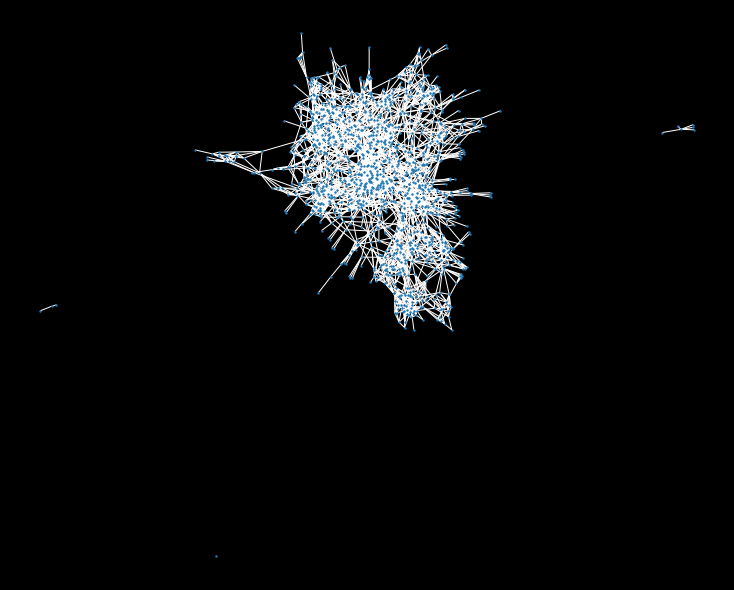

In [40]:
fig = plt.figure(figsize = (10,8))
layout = nx.spring_layout(graph_data)
colors = np.linspace(0,1, len(graph_data.nodes))
nx.draw(graph_data,
       node_size = 2,
       node_colors = colors,
       pos = layout,
       edge_color = 'white')
fig.set_facecolor('black')

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


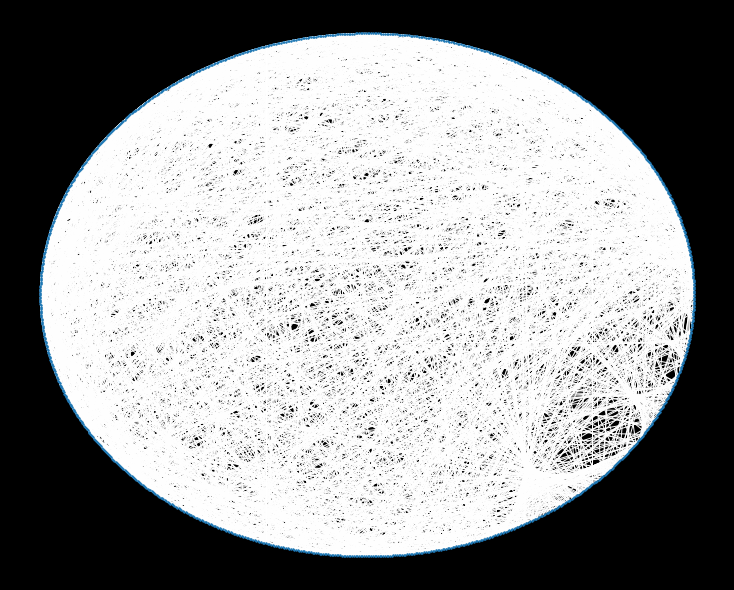

In [64]:
fig = plt.figure(figsize = (10,8))
pos = nx.shell_layout(graph_data)
colors = np.linspace(0,1, len(graph_data.nodes))
nx.draw(graph_data,
       node_size = 2,
       node_colors = colors,
       pos = pos,
       edge_color = 'white')
fig.set_facecolor('black')

In [87]:
### Centrality Measure
import operator
def centality_measure(dic):
    return sorted(dic.items() , key = operator.itemgetter(1))[::-1]

#### Which node has the highest degree centrality ?
(Degree centrality : How many no. of connections does the each node have.)

In [88]:
deg_centrality = nx.degree_centrality(graph_data)

Degree Centrality


[('S-a35892', 0.015939597315436243),
 ('S-398c22', 0.012583892617449664),
 ('S-dbefe2', 0.01174496644295302),
 ('S-c28e2c', 0.01174496644295302),
 ('S-0b0f42', 0.01174496644295302),
 ('S-c97c44', 0.010906040268456376),
 ('S-1801bd', 0.010906040268456376),
 ('S-b46c42', 0.010067114093959731),
 ('S-1cdff0', 0.010067114093959731),
 ('S-c1b610', 0.010067114093959731)]

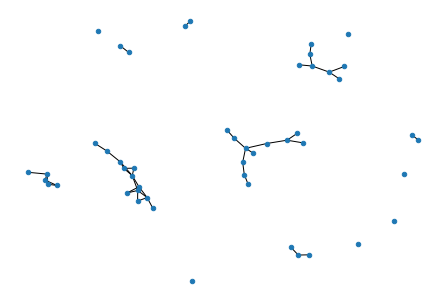

In [115]:
deg_centrality = nx.degree_centrality(graph_data)
deg_centrality = centality_measure(deg_centrality)
deg_centrality[:10]
deg_cent = [n[0] for n in deg_centrality[:50]]
subplot = graph_data.subgraph(deg_cent)
print('Degree Centrality')
nx.draw(subplot, color = 'c1', node_size = 20)
deg_centrality[:10]

### Betweenness centrality : The shorest reachable path

This metric is measured with the number of shortest paths

[('S-95f57d', 0.0408949487500073),
 ('S-b1baa7', 0.04076911344928284),
 ('S-376418', 0.03871571953940905),
 ('S-9671d9', 0.03826215379996448),
 ('S-d00f38', 0.03638539856944858),
 ('S-4ea0d4', 0.03573093656426731),
 ('S-5c36a0', 0.03541073450202198),
 ('S-af1602', 0.034150273959818574),
 ('S-25fb37', 0.033868809647678674),
 ('S-8c6f6e', 0.033515868014497706),
 ('S-3db498', 0.03348535600444935),
 ('S-2e5e97', 0.032909662555473014),
 ('S-10064d', 0.03202192006578699),
 ('S-604fa0', 0.03180012950083413),
 ('S-2188fa', 0.030998151806747122),
 ('S-40a2fb', 0.03064239314366026),
 ('S-593057', 0.02935368323066717),
 ('S-e25455', 0.02918844181432609),
 ('S-4cf964', 0.028231748822547593),
 ('S-168823', 0.028043256256303696),
 ('S-76bec9', 0.0280330407267125),
 ('S-d5f474', 0.027311578624427027),
 ('S-41b726', 0.026809873565875192),
 ('S-3e7af3', 0.026704020605938992),
 ('S-e5975e', 0.026443371040440335),
 ('S-d92f6d', 0.025969186882956043),
 ('S-713884', 0.02581643192197368),
 ('S-1808c5', 0.02

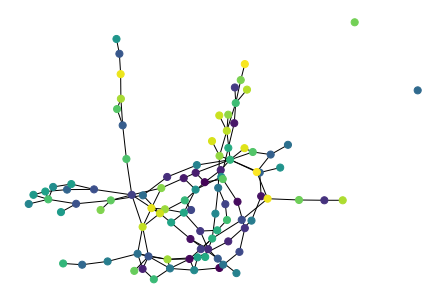

In [122]:
bet_centrality = nx.betweenness_centrality(graph_data)
sort_betweeness = centality_measure(bet_centrality)
sort_betweeness[10:]
between_cent = [n[0] for n in sort_betweeness[:100]]
between_sub = graph_data.subgraph(between_cent)
color = np.linspace(0,1,100)
nx.draw(between_sub, color = 'c1', node_size = 50, node_color= color)
sort_betweeness[10:]

### Closeness Centrality 

### Closeness Centrality
Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph. The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. Nodes with a high closeness score have the shortest distances to all other nodes.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


[('S-a35892', 0.2108443771573034),
 ('S-1801bd', 0.20719177879042774),
 ('S-0a6a1a', 0.2058092875535469),
 ('S-c28e2c', 0.20250240024489455),
 ('S-b46c42', 0.2022926980699775),
 ('S-af1602', 0.20190936995993963),
 ('S-2188fa', 0.19838928446470036),
 ('S-398c22', 0.19642766760808608),
 ('S-b51bc4', 0.19613184280747148),
 ('S-593057', 0.19551024063677228)]

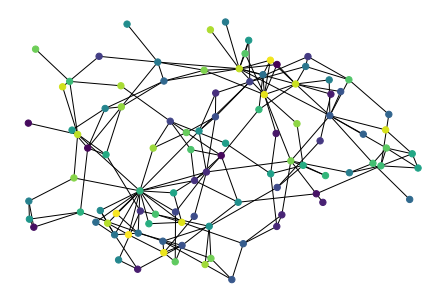

In [128]:
closeness_cent = nx.closeness_centrality(graph_data)
sorted_closeness = centality_measure(closeness_cent)

closness_plot = [n[0] for n in sorted_closeness[:100]]
closness_sub = graph_data.subgraph(closness_plot)
color = np.linspace(0,1,100)
nx.draw(closness_sub, node_color = color, node_size = 40)
sorted_closeness[:10]

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


[('S-a35892', 0.2108443771573034),
 ('S-1801bd', 0.20719177879042774),
 ('S-0a6a1a', 0.2058092875535469),
 ('S-c28e2c', 0.20250240024489455),
 ('S-b46c42', 0.2022926980699775),
 ('S-af1602', 0.20190936995993963),
 ('S-2188fa', 0.19838928446470036),
 ('S-398c22', 0.19642766760808608),
 ('S-b51bc4', 0.19613184280747148),
 ('S-593057', 0.19551024063677228)]

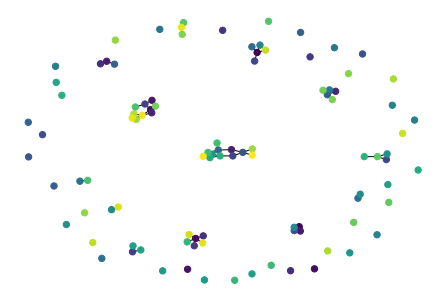

In [129]:
closeness_cent = nx.closeness_centrality(graph_data)
sorted_closeness = centality_measure(closeness_cent)

closness_plot = [n[0] for n in sorted_closeness[-100:]]
closness_sub = graph_data.subgraph(closness_plot)
color = np.linspace(0,1,100)
nx.draw(closness_sub, node_color = color, node_size = 40)
sorted_closeness[:10]

### Degree of the nodes 

The node degree is the number of edges adjacent to the node. The weighted node degree is the sum of the edge weights for edges incident to that node.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


[('S-a35892', 19),
 ('S-398c22', 15),
 ('S-dbefe2', 14),
 ('S-c28e2c', 14),
 ('S-0b0f42', 14),
 ('S-c97c44', 13),
 ('S-1801bd', 13),
 ('S-b46c42', 12),
 ('S-1cdff0', 12),
 ('S-c1b610', 12)]

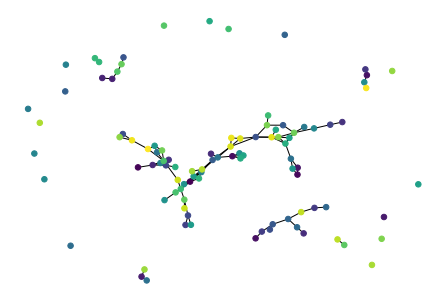

In [161]:

sorted_degree = sorted(graph_data.degree, key = operator.itemgetter(1))[::-1]
sorted_degree[:10]
sorted_deg = [n[0] for n in sorted_degree[:100]]
degree_sub = graph_data.subgraph(sorted_deg)
color = np.linspace(0,1, 100)
nx.draw(degree_sub, node_color = color, node_size = 30)
sorted_degree[:10]

### Page Rank:

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


[('S-a35892', 0.0031233081590740334),
 ('S-398c22', 0.0027047583727214997),
 ('S-3586c8', 0.0024759682106079268),
 ('S-4cf964', 0.0021038819207916306),
 ('S-d92f6d', 0.0019102505811393808),
 ('S-b46c42', 0.0018967401769155753),
 ('S-dbefe2', 0.0018966449181149593),
 ('S-376418', 0.0018776389610635333),
 ('S-c28e2c', 0.0018573535373463367),
 ('S-0a6a1a', 0.0018472247008895447)]

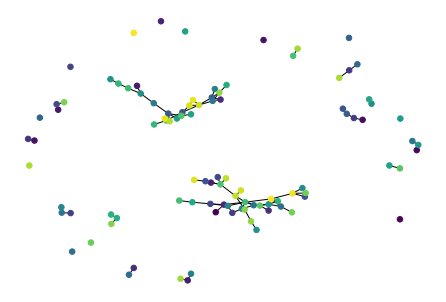

In [167]:
page_rank  =nx.pagerank(graph_data, alpha= 0.85)
sort_pagerank  = centality_measure(page_rank)
page_sort = [n[0] for n in sort_pagerank[:100]]
page_subplot = graph_data.subgraph(page_sort)
color = np.linspace(0,1,100)
nx.draw(page_subplot, node_color = color, node_size = 30)
sort_pagerank[:10]

### Community Graphs